# 2. Top N

This notebook shows how to run the Top-N DDA method on a ViMMS dataset

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../..')

In [4]:
from pathlib import Path

In [5]:
from vimms.MassSpec import IndependentMassSpectrometer
from vimms.Controller import TopNController
from vimms.Environment import Environment
from vimms.Common import *

### Load the data

In [6]:
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','..','tests','fixtures'))
dataset = load_obj(os.path.join(data_dir, 'QCB_22May19_1.p'))

### Run Top N Controller

In [7]:
rt_range = [(0, 1440)]
min_rt = rt_range[0][0]
max_rt = rt_range[0][1]

In [8]:
isolation_window = 1
N = 3
rt_tol = 15
mz_tol = 10
min_ms1_intensity = 1.75E5

In [9]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset)
controller = TopNController(POSITIVE, N, isolation_window, mz_tol, rt_tol, min_ms1_intensity)

In [10]:
# create an environment to run both the mass spec and controller
env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)

# set the log level to WARNING so we don't see too many messages when environment is running
set_log_level_warning()

# run the simulation
env.run()

(1440.200s) ms_level=1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1439.8000000000932/1440 [00:21<00:00, 66.25it/s]


Simulated results are saved to the following .mzML file and can be viewed in tools like ToppView or using other mzML file viewers.

In [11]:
set_log_level_debug()
mzml_filename = 'topn_controller.mzML'
out_dir = os.path.join(os.getcwd(), 'results')
env.write_mzML(out_dir, mzml_filename)

2021-08-30 14:56:37.016 | DEBUG    | vimms.Environment:write_mzML:149 - Writing mzML file to C:\Users\joewa\Work\git\vimms\demo\02. Methods\results\topn_controller.mzML
2021-08-30 14:56:45.588 | DEBUG    | vimms.Environment:write_mzML:152 - mzML file successfully written!


The generated simulated scan results can also be plotted for visualisation.

Here are the first 10 MS1 scans

In [12]:
env.controller.scans[1][:10]

[Scan 100000 num_peaks=0 rt=0.00 ms_level=1,
 Scan 100001 num_peaks=16 rt=0.40 ms_level=1,
 Scan 100003 num_peaks=16 rt=1.00 ms_level=1,
 Scan 100004 num_peaks=16 rt=1.40 ms_level=1,
 Scan 100005 num_peaks=16 rt=1.80 ms_level=1,
 Scan 100006 num_peaks=16 rt=2.20 ms_level=1,
 Scan 100007 num_peaks=16 rt=2.60 ms_level=1,
 Scan 100008 num_peaks=16 rt=3.00 ms_level=1,
 Scan 100009 num_peaks=16 rt=3.40 ms_level=1,
 Scan 100010 num_peaks=16 rt=3.80 ms_level=1]

Retrieve the second scan having num_peaks > 0, and plot it.

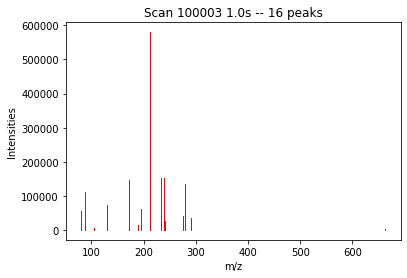

In [17]:
sc = env.controller.scans[1][2]
env.plot_scan(sc)